In [11]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGroq(model="openai/gpt-oss-120b")

In [4]:
def call_model(state: MessagesState):
    
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

In [6]:
builder = StateGraph(MessagesState)

builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", END)

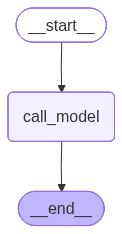

In [7]:
graph = builder.compile()
graph

In [9]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Muhammad Hamza."}]})

{'messages': [HumanMessage(content='Hi! My name is Muhammad Hamza.', additional_kwargs={}, response_metadata={}, id='a4a8dc34-b6d7-40ad-ab77-c8b97fa78c09'),
  AIMessage(content='Hello, Muhammad Hamza! 👋 Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hi! My name is Muhammad Hamza." Likely they want a greeting. We should respond politely, maybe ask how can we help. No disallowed content. So respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 80, 'total_tokens': 151, 'completion_time': 0.151403156, 'completion_tokens_details': {'reasoning_tokens': 42}, 'prompt_time': 0.003391639, 'prompt_tokens_details': None, 'queue_time': 0.071588377, 'total_time': 0.154794795}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_034a22d020', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbe2d-06eb-7c23-aab1-03bb65c5851e-0',

In [10]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]})

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='6e3dd98b-4a7c-465b-abd0-1839dedba257'),
  AIMessage(content='I don’t have any information about your name. If you’d like me to address you a certain way, just let me know!', additional_kwargs={'reasoning_content': 'The user asks "What is my name?" There\'s no prior context giving the name. According to policy, we must not guess personal info. We can respond that we don\'t have that info.'}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 76, 'total_tokens': 151, 'completion_time': 0.157269589, 'completion_tokens_details': {'reasoning_tokens': 39}, 'prompt_time': 0.025652015, 'prompt_tokens_details': None, 'queue_time': 0.08176505, 'total_time': 0.182921604}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_26a11cc075', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbe2e-008b-

In [12]:
def call_model(state: MessagesState):
  
  response = llm.invoke(state["messages"])
  return {"messages": [response]}

In [13]:
builder = StateGraph(MessagesState)

builder.add_node("call_model", call_model)

builder.add_edge(START, "call_model")
builder.add_edge("call_model", END)

In [14]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [19]:
config = {"configurable": {"thread_id": "thread-1"}}
config2 = {"configurable": {"thread_id": "thread-2"}}

In [20]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Muhammad Hamza."}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Muhammad Hamza.', additional_kwargs={}, response_metadata={}, id='92de64a1-a66b-41ca-a1a6-55866a6f1c49'),
  AIMessage(content='Hello, Muhammad Hamza! 👋 Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hi! My name is Muhammad Hamza." Probably they want a greeting or introduction. We should respond politely, maybe ask how we can help. No disallowed content. So respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 80, 'total_tokens': 152, 'completion_time': 0.153270138, 'completion_tokens_details': {'reasoning_tokens': 43}, 'prompt_time': 0.004166885, 'prompt_tokens_details': None, 'queue_time': 0.035051052, 'total_time': 0.157437023}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_1d982b31b2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbe34-81ce-79e3-b89

In [21]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config2)

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='524ab211-16a4-4d56-9b7d-e6d869841e01'),
  AIMessage(content='I don’t have any information about your name. If you’d like, you can tell me what you’d like to be called!', additional_kwargs={'reasoning_content': 'The user asks "What is my name?" There\'s no prior context. According to policy, we cannot guess personal info. We must respond that we don\'t know the name. Offer to ask.'}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 76, 'total_tokens': 151, 'completion_time': 0.157225143, 'completion_tokens_details': {'reasoning_tokens': 39}, 'prompt_time': 0.009232322, 'prompt_tokens_details': None, 'queue_time': 0.045971986, 'total_time': 0.166457465}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4140daa9c2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbe35-08fc-7940-be

In [24]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content)

- HumanMessage : Hi! My name is Muhammad Hamza.
- AIMessage : Hello, Muhammad Hamza! 👋 Nice to meet you. How can I assist you today?
- HumanMessage : What is my name?
- AIMessage : Your name is Muhammad Hamza.
- HumanMessage : Hi! My name is Muhammad Hamza.
- AIMessage : Hello again, Muhammad Hamza! 👋 How can I help you today?
